# trial structure simulation 

In [ ]:
#write simulator for various trial structures
#(should be able to change one parameter and plot new structure)
#should maybe be a function with nTrials, etc. as inputs? 

In [34]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import random as rd
from matplotlib import animation, rc
from IPython.display import HTML 
import csv
%matplotlib inline

#tuesday afternoon 
#github vrsn control 
#function for trialstructure, simulate, then experimental 
#3-4 papers a week (accumulation & DM, yael niv, josh gold, spreadsheet, key images and figures))

In [2]:
#constants
baseEpochLen = 40
nEpochs = 20
baseLen = baseEpochLen #these trials can be null?
# noResponse_pt = -100 #this goes more into the actual task code 
# feedback_time = 500
# trial_time = 1000
nTrials = 1000 #20 epochs, last epoch will assess "explore/exploit aftereffect"
#volatility sampled from a uniform distribution 
#sigma and lambda held constant within a session 


In [3]:
#specify the balance of reward and punishment; mapping from -1:1 space to point values
#color of timing bar, etc. in the actual task code

#also include probablistic length of each epoch, sampling from a poisson process? 
# poisson_EpochLen = np.ones((1,nTrials)
# print(np.size(poisson_EpochLen))
                        
# #maintain constant the nTrials and number of epochs                         
# while np.sum(poisson_EpochLen) != nTrials:
#     poisson_EpochLen = np.random.poisson(baseEpochLen, nEpochs)

# print(np.sum(poisson_EpochLen))                        
# plt.hist(x)
# print(poisson_EpochLen)
# print(np.sum(poisson_EpochLen))

#but how would i fix the percentage? 
nStopTrials = round(.10*nTrials, 0) #10% of trials; don't include in baseline
print(nStopTrials)

80.0


## reward statistics


In [32]:
 #need same absolute number of reward means  
# transition is what will be important to change 
# start with one trial structure

#set of parameters for 20 different distributions 

mu_p = np.array(rd.sample(list(np.linspace(.25,.75, 20)),10))
mu_n = -1*mu_p
mu = np.hstack((mu_p, mu_n))

#repeat to match nEpochs
sigma = [.05, .25]
# print(sigma)
# print(len(sigma))

# print(sigma)
# print(np.mean(mu))

#why not first initalize it as a flattened array? 
epochReward_highVar = np.ones((nEpochs, nTrials))
epochReward_lowVar = np.ones((nEpochs, nTrials))

# print(np.size(epochReward))


#first half
# for i in range(0,nEpochs):
i = 0 

for row in epochReward_lowVar:
    while np.any(np.abs(row) >= 1): #replace trials in epoch > 1 if needed
        row[np.abs(row)>=1] = np.random.normal(mu[i], sigma[0],
        row[np.abs(row)>=1].size) 
        #find elements that don't meet criterion and replace
#         print(sigma[i])
    i += 1
    

row = 0

for row in epochReward_lowVar:
    while np.any(np.abs(row) >= 1): #replace trials in epoch > 1 if needed
        row[np.abs(row)>=1] = np.random.normal(mu[i], sigma[1],
        row[np.abs(row)>=1].size) 
        #find elements that don't meet criterion and replace
#         print(sigma[i])
    i += 1
print(epochReward_lowVar)
print(epochReward_highVar)
        
# print(epochReward[:,:])
# print(mu[i])
# print(sigma)
# plt.hist(epochReward)
# print(epochReward[np.abs(epochReward)>=1])

epochReward_flat_lowVar = epochReward_lowVar.flatten()
epochReward_flat_highVar = epochReward_highVar.flatten()


[[ 0.43658611  0.44174837  0.42565289 ...,  0.43026026  0.51180071
   0.50999017]
 [ 0.26743358  0.2505485   0.24921048 ...,  0.23898962  0.2507512
   0.17714854]
 [ 0.23806228  0.3666929   0.26954755 ...,  0.28298843  0.37585096
   0.36919122]
 ..., 
 [-0.74246119 -0.77372201 -0.74080983 ..., -0.76073089 -0.67528504
  -0.64436767]
 [-0.58680378 -0.65148679 -0.71902752 ..., -0.59509893 -0.68339913
  -0.65606074]
 [-0.3944289  -0.27120601 -0.37053313 ..., -0.46339112 -0.24505931
  -0.3307437 ]]
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


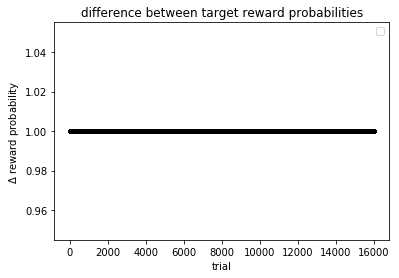

In [30]:
#need to reverse engineer the actual values for targets
#assume baseline value of .5 for each
baseTargets = 0.5*np.ones((nTrials,2))

varSwitch = 2

if varSwitch == 1:
    epochReward_flat = epochReward_flat_lowVar
elif varSwitch == 2: 
    epochReward_flat = epochReward_flat_highVar

epochReward_flat_div = epochReward_flat / 2
adjustedTargets = np.ones_like(baseTargets)
#always add half and subtract half of target value
for i in range(0, len(baseTargets)):
    adjustedTargets[i,0] = baseTargets[i,0] +  epochReward_flat_div[i]
    adjustedTargets[i,1] = baseTargets[i,1] -  epochReward_flat_div[i]

# print(adjustedTargets)
#make last epoch a 100% reward for the left (or right) target, can counterbalance
# adjustedTargets[]

# plt.title("raw target reward probabilities")
# plt.xlabel("trial")
# plt.ylabel("reward probability")
# plt.legend(["t1", "t2"])
# plt.plot(adjustedTargets[1:800,0], 'b.')
# plt.plot(adjustedTargets[1:800,1], 'g.')


plt.title("difference between target reward probabilities")
plt.xlabel("trial")
plt.ylabel("$\Delta$ reward probability")
plt.legend(["t1", "t2"])
plt.plot(epochReward_flat, 'k.')


In [ ]:
#rearrange to emphasize transitions/changepoints

## stop trial selection


In [ ]:
#this samples without replacement

#poisson dist. 

trialPopulation = np.linspace(1, nTrials, num = nTrials, endpoint = True)
# print(trialPopulation)

#randomly sample from list without replacement 
stopTrials = rd.sample(list(trialPopulation), nStopTrials)
#print(stopTrials)
#check that all values are unique
#print(np.unique(stopSelector).size == len(stopSelector))

stopTrials_zeros = np.zeros((nTrials,1))
np.put(stopTrials_zeros, stopTrials, 1)
# print(stopTrials_zeros)

plt.title("stop trial incidence")
plt.xlabel("trial")
plt.ylabel("stop trial")
plt.plot(stopTrials_zeros, 'r.')
plt.show()


# animate trial structure

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -2, 2))
ax.set_ylim((-2, 2))

sinegraph, = ax.plot([], [])
dot, = ax.plot([], [],'o', color='red')

x = np.linspace(0, 2, 1000)
y = np.cos(x)

In [ ]:
# initialization function: plot the background of each frame
def init():
    dot.set_data([], [])
    return (dot,)

In [ ]:
# animation function. This is called sequentially
def animate(i): 
#     y2 = np.ones(0, 2, 1000)
#     jitter = np.random.normal(0, 1, (100,1))
#     y=np.linspace(-1, 1, num=1000) * (x - 0.01 * i)
    sinegraph.set_data(x[:i],y[:i])
    dot.set_data(x[i],y[i])
    return (dot,)


In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=10000, blit=True)

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
#interface with radd kyle


## print parameters to a csv file 

In [ ]:
test = np.arange(20) #this will be an array of values corresponding to the parameters

trial = np.vstack(np.linspace(1, nTrials, 800))

# file_mat = [trial, adjustedTargets[:,0],adjustedTargets[:,1] stopTrials_zeros]

print(trial)
header = ("trial, stop, t1_baseReward, t2_baseReward, ssd, lambda1, lambda2, mu1, mu2, ")
          
np.savetxt('VolVal_TrialStructure.csv',file_mat, header = header, delimiter=',', comments = '')